In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [3]:
diabetes = pd.read_csv("pima-indians-diabetes.csv")

In [4]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [6]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [7]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [8]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [9]:
num_preg = tf.feature_column.numeric_column("Number_pregnant")
plasma_gluc = tf.feature_column.numeric_column("Glucose_concentration")
dias_press = tf.feature_column.numeric_column("Blood_pressure")
triceps = tf.feature_column.numeric_column("Triceps")
insulin = tf.feature_column.numeric_column("Insulin")
bmi = tf.feature_column.numeric_column("BMI")
diabetes_pedigree = tf.feature_column.numeric_column("Pedigree")
age = tf.feature_column.numeric_column("Age")

In [10]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list("Group", ["A","B","C","D"])

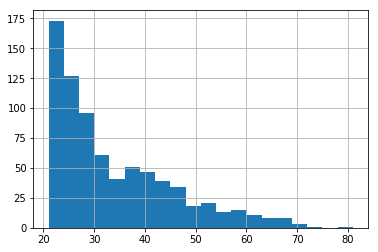

In [11]:
diabetes["Age"].hist(bins=20)

In [12]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [13]:
feat_cols = [num_preg, plasma_gluc, dias_press,triceps,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [14]:
x_data = diabetes.drop("Class", axis=1)

In [15]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [16]:
labels = diabetes["Class"]

In [19]:
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels, test_size=0.3)

In [22]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [23]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\zEros\\AppData\\Local\\Temp\\tmp14vwj413', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000021D6309F780>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
model.train(input_fn=input_func, steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\zEros\AppData\Local\Temp\tmp14vwj413\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 237.6
INFO:tensorflow:loss = 6.5890894, step = 101 (0.425 sec)
INFO:tensorflow:global_step/sec: 482.06
INFO:tensorflow:loss = 4.580632, step = 201 (0.211 sec)
INFO:tensorflow:global_step/sec: 459.94
INFO:tensorflow:loss = 4.3701735, step = 301 (0.214 sec)
INFO:tensorflow:global_step/sec: 447.622
INFO:tensorflow:loss = 4.0874395, step

In [25]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(X_test, y_test, batch_size=10, num_epochs=1, shuffle=False)

In [26]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-04-18:21:53
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\zEros\AppData\Local\Temp\tmp14vwj413\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-01-04-18:21:53
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74891776, accuracy_baseline = 0.6233766, auc = 0.8189256, auc_precision_recall = 0.7002709, average_loss = 0.51893723, global_step = 1000, label/mean = 0.37662336, loss = 4.994771, precision = 0.73015875, prediction/mean = 0.3558737, recall = 0.52873564
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\zEros\AppData\Local\Temp\tmp14vwj413\model.ckpt-1000


In [27]:
results

{'accuracy': 0.74891776,
 'accuracy_baseline': 0.6233766,
 'auc': 0.8189256,
 'auc_precision_recall': 0.7002709,
 'average_loss': 0.51893723,
 'global_step': 1000,
 'label/mean': 0.37662336,
 'loss': 4.994771,
 'precision': 0.73015875,
 'prediction/mean': 0.3558737,
 'recall': 0.52873564}

In [28]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(X_test, y_test, batch_size=10, num_epochs=1, shuffle=False)

In [29]:
predictions = model.predict(pred_input_func)

In [31]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\zEros\AppData\Local\Temp\tmp14vwj413\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [32]:
my_pred

[{'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3759856], dtype=float32),
  'logits': array([-0.5066226], dtype=float32),
  'probabilities': array([0.6240144, 0.3759856], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.46714953], dtype=float32),
  'logits': array([-0.13159132], dtype=float32),
  'probabilities': array([0.53285044, 0.46714956], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.17689255], dtype=float32),
  'logits': array([-1.5375443], dtype=float32),
  'probabilities': array([0.8231074 , 0.17689255], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.43904933], dtype=float32),
  'logits': array([-0.24502122], dtype=float32),
  'probabilities': array([0.5609507 , 0.43904933], dtype=float32)},
 {'class_

In [33]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\zEros\\AppData\\Local\\Temp\\tmpub7o3szf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000021D65E33710>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [34]:
dnn_model.train(input_func)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

originally defined at:
  File "C:\Users\zEros\Anaconda3\lib\site-packages\tensorflow\python\estimator\canned\dnn.py", line 108, in dnn_logit_fn
    name='dnn')
  File "C:\Users\zEros\Anaconda3\lib\site-packages\tensorflow\python\estimator\canned\dnn.py", line 143, in __init__
    create_scope_now=False)
  File "C:\Users\zEros\Anaconda3\lib\site-packages\tensorflow\python\feature_column\feature_column.py", line 323, in __init__
    self._name, _internal_input_layer, create_scope_now_=create_scope_now)
  File "C:\Users\zEros\Anaconda3\lib\site-packages\tensorflow\python\ops\template.py", line 154, in make_template
    **kwargs)


In [35]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [36]:
feat_cols = [num_preg, plasma_gluc, dias_press,triceps,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [38]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [47]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\zEros\\AppData\\Local\\Temp\\tmpq30zpebd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000021D65EA5B70>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [48]:
dnn_model.train(input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\zEros\AppData\Local\Temp\tmpq30zpebd\model.ckpt.
INFO:tensorflow:loss = 6.9479966, step = 1
INFO:tensorflow:global_step/sec: 265.959
INFO:tensorflow:loss = 5.7294006, step = 101 (0.382 sec)
INFO:tensorflow:global_step/sec: 468.544
INFO:tensorflow:loss = 7.019508, step = 201 (0.214 sec)
INFO:tensorflow:global_step/sec: 445.634
INFO:tensorflow:loss = 4.823039, step = 301 (0.223 sec)
INFO:tensorflow:global_step/sec: 443.659
INFO:tensorflow:loss = 4.8007755, step = 401 (0.225 sec)
INFO:tensorflow:global_step/sec: 459.944
INFO:tensorflow:loss = 3.5572896, step = 501 (0.217 sec)
INFO:tensorflow:global_step/sec: 457.838
INFO:tensorflow:loss = 5.320199, step = 601 (0.220 sec)
INFO:tensorflow:global_step/sec

In [49]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(X_test, y_test, batch_size=10, num_epochs=1, shuffle=False)

In [50]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-04-18:31:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\zEros\AppData\Local\Temp\tmpq30zpebd\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-01-04-18:31:18
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.6233766, auc = 0.81385696, auc_precision_recall = 0.69282234, average_loss = 0.5135271, global_step = 1000, label/mean = 0.37662336, loss = 4.9426985, precision = 0.6708861, prediction/mean = 0.3549425, recall = 0.6091954
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\zEros\AppData\Local\Temp\tmpq30zpebd\model.ckpt-1000


{'accuracy': 0.74025977,
 'accuracy_baseline': 0.6233766,
 'auc': 0.81385696,
 'auc_precision_recall': 0.69282234,
 'average_loss': 0.5135271,
 'global_step': 1000,
 'label/mean': 0.37662336,
 'loss': 4.9426985,
 'precision': 0.6708861,
 'prediction/mean': 0.3549425,
 'recall': 0.6091954}